# Итоговая работа

## Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать следующие данные: kc-house-data
1.2. Изучите стоимости недвижимости
1.3. Изучите распределение квадратуры жилой
1.4. Изучите распределение года постройки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
df=pd.read_csv("kc-house-data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

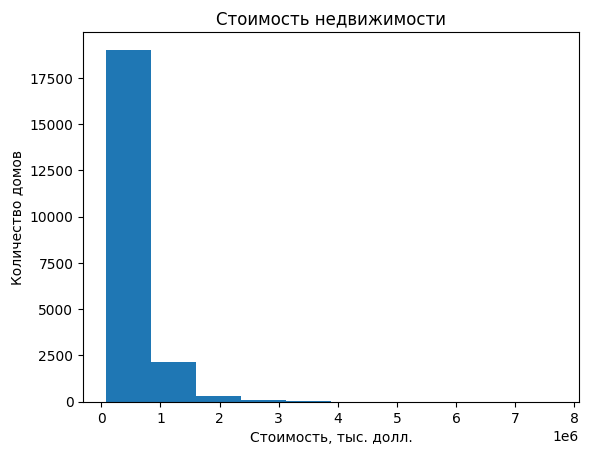

In [6]:
plt.hist(df["price"])
plt.title("Стоимость недвижимости")
plt.xlabel("Стоимость, тыс. долл.")
plt.ylabel("Количество домов");

Основная часть недвижимости находится в ценовом диапазонге до 0,9 тыс. долларов. Небольшая часть недвижимости - от 0,9 до  1,6 тыс. долларов. И остальные дома - в диапазоне от  1,6 до 3,9 тыс. долларов.

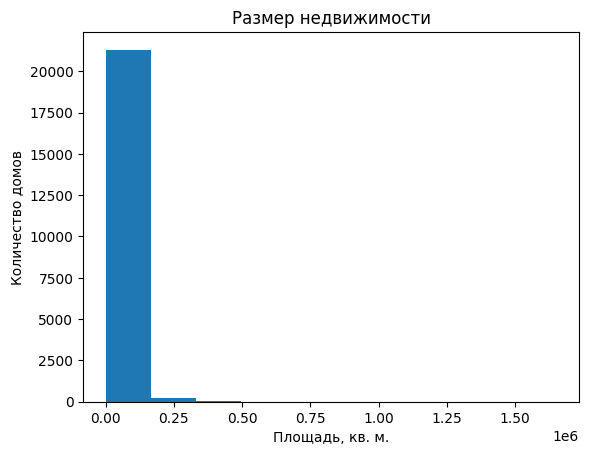

In [7]:
plt.hist(df["sqft_lot"])
plt.title("Размер недвижимости")
plt.xlabel("Площадь, кв. м.")
plt.ylabel("Количество домов");

Основная часть недвижимости размером до 200 кв.м. Небольшая часть недвижимости - от 200 до  500 кв.м.

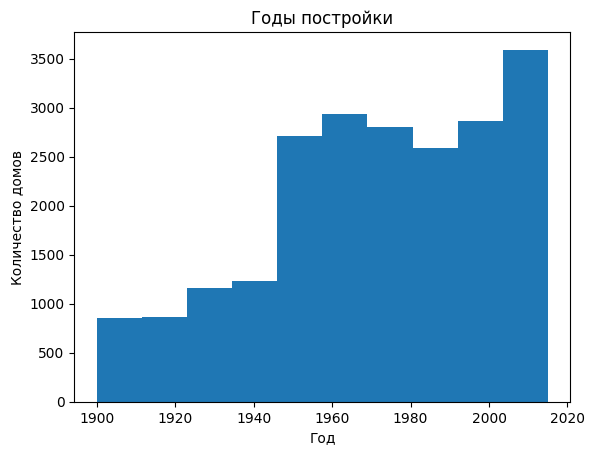

In [8]:
plt.hist(df["yr_built"])
plt.title("Годы постройки")
plt.xlabel("Год")
plt.ylabel("Количество домов");

3500 домов из выборки построены в 2015-2017 гг. Однако большая часть домов строились в промежутке от 1950 до 2015 гг. И около трети всей базы недвижимости старше 1950 г.

## Задача 2
2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2. Изучите распределение этажей домов
2.3. Изучите распределение состояния домов

In [25]:
count_view = df['waterfront'].value_counts()
count_view

waterfront
0    21450
1      163
Name: count, dtype: int64

In [27]:
names = count_view.index
values = count_view.values

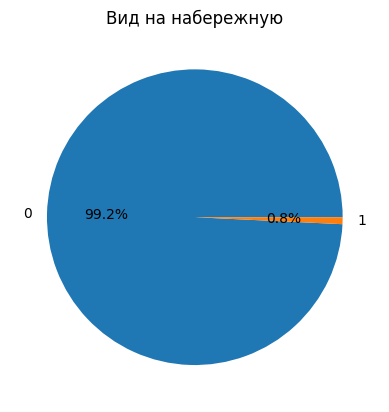

In [28]:
plt.title("Вид на набережную")
plt.pie(values, autopct='%.1f%%', labels = names);

Только менее 1% домов имеют вид на набережную.

In [17]:
count_floors = df['floors'].value_counts()
count_floors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [18]:
names = count_floors.index
values = count_floors.values

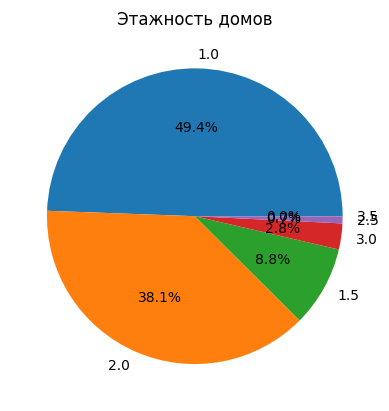

In [19]:
plt.title("Этажность домов")
plt.pie(values, autopct='%.1f%%', labels = names);

Самое большое количество домов имеют один этаж (почти 50%), около 38% имеют этажность 2 этажа, около 9 % имеют цокольный этаж или мансарду, остальные дома выше 2 этажей (до 3,5).

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости на основе матрицы корреляции.


In [20]:
import numpy as np

In [23]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


На показатель  grade больше всего влияет жилая площадь и чуть менее влияют цена и количество ванных комнат. А на цену влияют больше всего жилая площадь и grade. Вид на набережную, этажность и количество спален и ванных комнат не значительно влияют на цену.